In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 업로드
disney = pd.read_csv('/content/drive/MyDrive/Data/disney.csv')

In [ ]:
# 컬럼명
disney.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# 상단 행 3개
disney.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.


In [ ]:
# 데이터프레임 정보
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
# 결측치 비율 확인
for i in disney.columns :
  countNullRate = disney[i].isna().sum() / len(disney) * 100
  if countNullRate > 0 :
    print(f"'{i}'의 결측치 비율은 {round(countNullRate, 2)}% 입니다")

'director'의 결측치 비율은 32.62% 입니다
'cast'의 결측치 비율은 13.1% 입니다
'country'의 결측치 비율은 15.1% 입니다
'date_added'의 결측치 비율은 0.21% 입니다
'rating'의 결측치 비율은 0.21% 입니다


In [ ]:
# fillna()를 이용한 결측치 처리
disney['director'].fillna('No Data', inplace=True)
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,No Data,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
# replace()를 이용한 결측치 처리
disney['cast'].replace(np.nan, 'No Data', inplace=True)
disney['country'].replace(np.nan, 'No Data', inplace=True)

In [ ]:
# dropna()를 이용한 결측치 처리. 결측치 비율이 낮은 column에 사용
disney.dropna(axis=0, inplace=True)

In [ ]:
# 결측치 개수 확인
disney.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# date_added column 타입 변환
disney['date_added'] = pd.to_datetime(disney['date_added'])
disney['date_added']

0      2021-11-26
1      2021-11-26
2      2021-11-26
3      2021-11-26
5      2021-11-24
          ...    
1445   2021-06-04
1446   2021-04-02
1447   2020-12-18
1448   2020-09-18
1449   2020-04-01
Name: date_added, Length: 1444, dtype: datetime64[ns]

In [ ]:
# 새 column 생성
disney['month_added'] = disney['date_added'].dt.month
disney.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",No Data,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,11
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",No Data,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,11
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,11


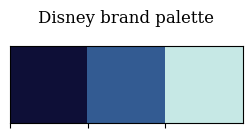

In [ ]:
# Disney 브랜드 상징 색깔 시각화
sns.palplot(['#0E0F37','#335B92','#C6E8E5'])

plt.title("Disney brand palette", loc='center', fontfamily='serif', fontsize=12, y=1.2)
plt.show()

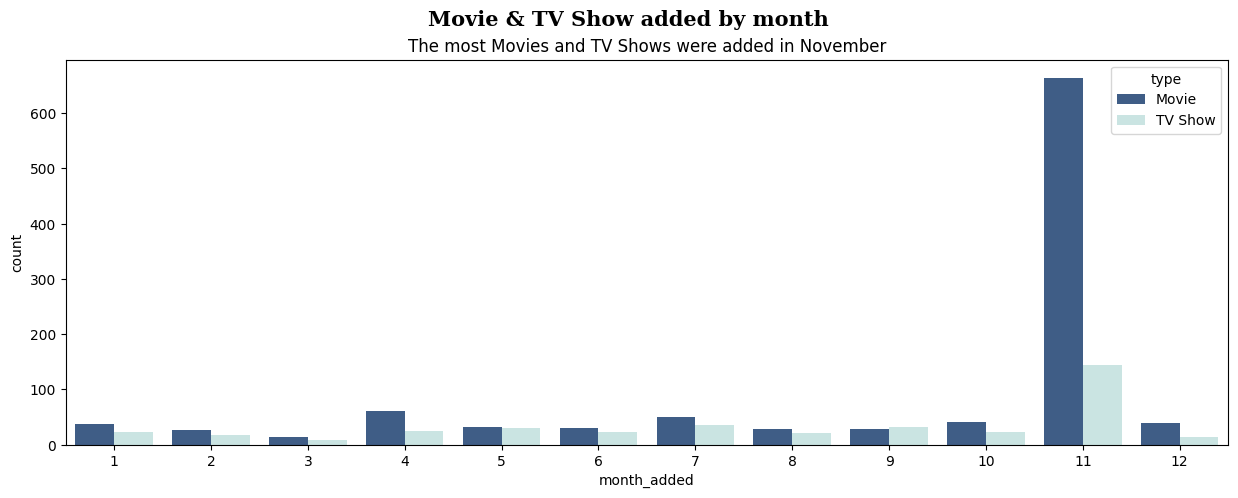

In [ ]:
# 월별 Movie & TV Show 수치 시각화
plt.figure(figsize=(15, 5))

sns.countplot(x=disney['month_added'], hue='type', palette=['#335B92','#C6E8E5'], data = disney)

plt.suptitle('Movie & TV Show added by month', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('The most Movies and TV Shows were added in November')

plt.show()

In [ ]:
# 워드 클라우드 생성 모듈
from wordcloud import WordCloud
from PIL import Image

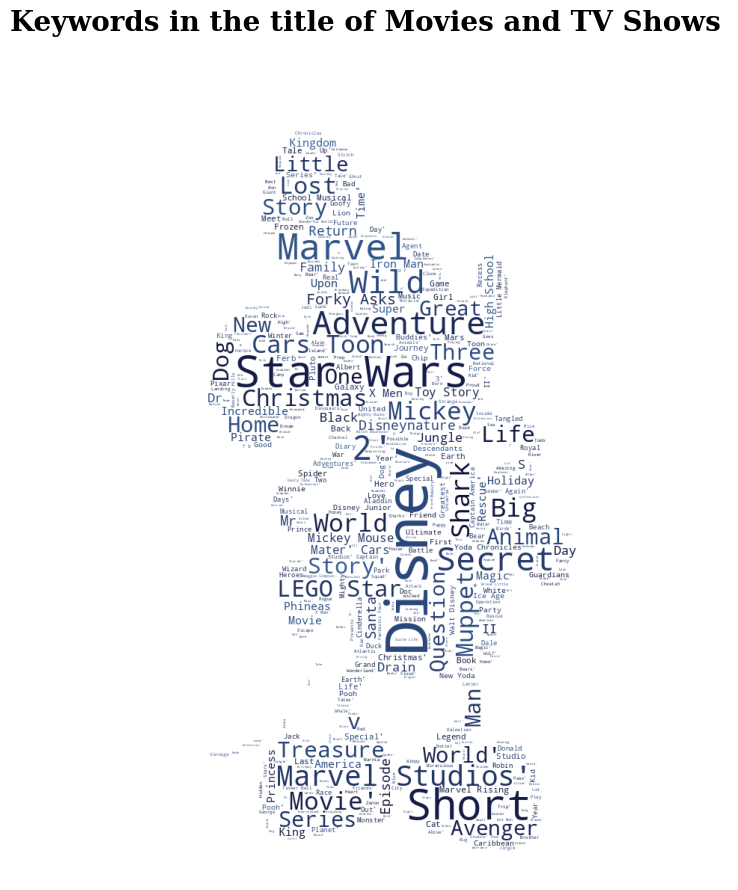

In [ ]:
# disney의 title 변수를 이용한 워드 클라우드 생성
plt.figure(figsize=(20, 10))

text = str(list(disney['title']))
mask = np.array(Image.open('/content/drive/MyDrive/Data/images/disney.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#335B92','#0E0F37'])

wordcloud = WordCloud(background_color='white', width=1000, height=1000, max_words=500, mask=mask, colormap=cmap).generate(text)

plt.suptitle("Keywords in the title of Movies and TV Shows", fontweight='bold', fontfamily='serif', fontsize=20)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()